# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANKModel import HANKModelClass

# Setup

In [2]:
model = HANKModelClass(name='baseline')

In [3]:
model_alt = model.copy(name='alt')
model_alt.par.sigma_z *= 1.1 

# Solve

In [4]:
models = [model,model_alt]
for model_ in models:
    
    print(f'###')
    print(f'### {model_.name}')
    print(f'###\n')
    
    model_.find_ss(do_print=True)
    print('')
    model_.compute_jac_hh(do_print=True)
    model_.compute_jac(do_print=True)
    print('')
    model_.find_transition_path(do_print=True)
    print('')
    

###
### baseline
###

household problem in ss solved in 8.2 secs [1514 iterations]
household problem in ss simulated in 3.3 secs [2253 iterations]

Implied K = 12.509
Implied Y =  1.562
Implied Z =  0.629
Implied K/Y =  8.006
Implied delta =  0.035
Discrepance in C-C_hh =   0.00000009

shockname = __ghost: household Jacobian computed in 6.4 secs
shockname = r: household Jacobian computed in 0.5 secs
shockname = w: household Jacobian computed in 0.5 secs
full Jacobian computed in 9.7 secs

finding the transition path:
 it =   0 -> max. abs. error =   0.06639445
 it =   1 -> max. abs. error =   0.00006188
 it =   2 -> max. abs. error =   0.00000013
 it =   3 -> max. abs. error =   0.00000000

clearing_A =   0.00000000

max abs. error:   0.00000000

transition path found in 0.9 secs

###
### alt
###

household problem in ss solved in 0.2 secs [1523 iterations]
household problem in ss simulated in 0.2 secs [2418 iterations]

Implied K = 15.207
Implied Y =  1.562
Implied Z =  0.587
Implied 

# IRFs

### input, exogenous ###


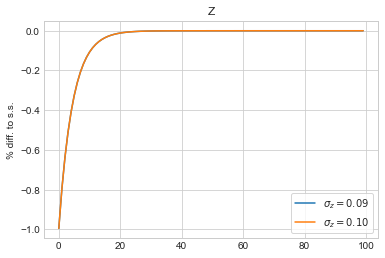


### paths ###


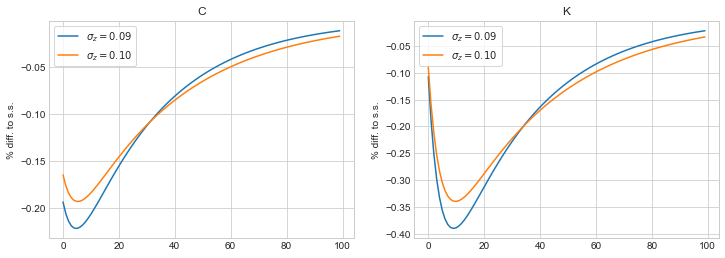


### tagets ###


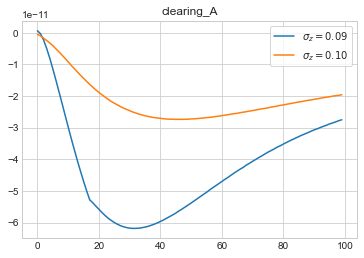

In [5]:
models = [model,model_alt]
labels = [fr'$\sigma_z = {model_.par.sigma_z:.2f}$' for model_ in models]
paths = ['C','K']
model.compare_IRFs(models,labels,paths,T_max=100)